# try for video 
https://github.com/timesler/facenet-pytorch/blob/master/examples/face_tracking.ipynb

# example video on youtube
https://www.youtube.com/channel/UCbjQrDDJvaNsp3DKHIAJVrA

# baseline data 
https://drive.google.com/drive/folders/1xlvYSnxGkopE5aEJ6kFtZ6AomI4l469z?usp=sharing



# for my data
https://github.com/NEU-Gou/awesome-reid-dataset
https://robustsystems.coe.neu.edu/sites/robustsystems.coe.neu.edu/files/systems/projectpages/reiddataset.html



# Inception resnet/MTCNN implementation code

python - https://github.com/timesler/facenet-pytorch
matcaffe - https://github.com/kpzhang93/MTCNN_face_detection_alignment


# MTCNN paper
https://kpzhang93.github.io/papers/spl.pdf


# for fine tuning 

https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html

https://github.com/timesler/facenet-pytorch/blob/master/examples/finetune.ipynb

In [11]:
from facenet_pytorch import MTCNN
import numpy as np
import cv2 #for imread, imshow, imwrite
import os
from matplotlib import pyplot as plt

In [8]:
###########Make path + filename###############
mtcnn = MTCNN(margin=0, keep_all=True, min_face_size=12, select_largest=False)


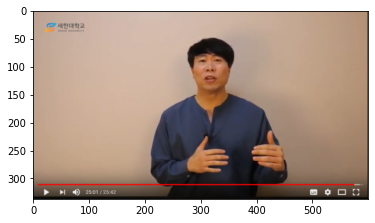

In [31]:
img = cv2.imread('test.png')
boxes, probs, landmarks = mtcnn.detect(img, landmarks=True)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [33]:
print(landmarks)
print(tuple(landmarks[0][0][:]))

[[[305.61362   92.619995]
  [332.43533   92.73552 ]
  [317.51596  105.26405 ]
  [307.54202  122.547745]
  [329.0399   123.08542 ]]]
(305.61362, 92.619995)


In [34]:
for i in range(5):
    img_with = cv2.circle(img, tuple(landmarks[0][i][:]),2,(0,255,255),2)

<ipython-input-34-d152719fbe8e>:2: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  img_with = cv2.circle(img, tuple(landmarks[0][i][:]),2,(0,255,255),2)


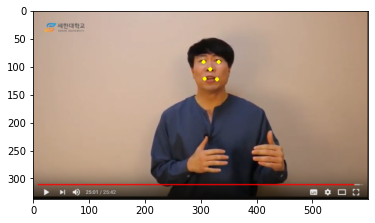

In [35]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# for video?

In [ ]:
dirnum = 0
d2 = 0

def save_all(dirname):
        filenames = os.listdir(dirname)
        global dirnum 
        dirnum += 1
        global d2
        d1=0
        for filename in filenames:
            full_filename = os.path.join(dirname, filename)
            if os.path.isdir(full_filename): #Stil dir
                save_all(full_filename)
            else:
                ext = os.path.splitext(full_filename)[-1]
                #########  new image start  ##########
                if ext == '.png': 
                    img = cv2.imread(full_filename)
                    boxes, probs, landmarks = mtcnn.detect(img, landmarks=True)
                    if boxes is None: #No bounding box detected
                        pass
                    else:
                        flag = 0
                        for i in boxes:
                            for j in i:
                                if j<0:
                                    flag = 1
                                    break
                        if flag != 1 :
                                #######choosing center box#######
                            min_box = boxes[0,:]
                            center = img.shape[1]/2
                            for box in boxes:
                                if (box[1]-center)<(min_box[1]-center):
                                    detected_face_repo2 = img[int(min_box[1]):int(min_box[3]), int(min_box[0]):int(min_box[2])]
                                    wfile = 'E:\CAD\img_use\Results\Repo2\wrong_%d.png'%d2
                                    cv2.imwrite(wfile, detected_face_repo2)
                                    d2+=1
                                    min_box = box
                                ###################################
                            detected_face = img[int(min_box[1]):int(min_box[3]), int(min_box[0]):int(min_box[2])]
                            path_img = 'E:/CAD/img_use/Results/Repo1/per%d/p%d.png'%(dirnum,d1)
                            save_path = 'E:/CAD/img_use/Results/Repo1/per%d'%dirnum
                            if not os.path.exists(save_path):
                                os.makedirs(save_path)
                            cv2.imwrite(path_img,detected_face) #detected_face
                            d1 += 1
                    
save_all("E:\CAD\img_use\prid_2011")

In [99]:
import os
dirnum = 0
d1 = 0
img = cv2.imread("E:/CAD/img_use/dataset_ETHZ/seq1/p010/frame0132Person06.png")
path_img = 'E:/CAD/img_use/Results/Repo1/per%d/p%d.png'%(dirnum,d1)
save_path = 'E:/CAD/img_use/Results/Repo1/per%d'%dirnum
if not os.path.exists(save_path):
    os.makedirs(save_path)
cv2.imwrite(path_img,img)
                    

True

In [92]:
dirnum = 0
d1 = 0
img = cv2.imread("E:/CAD/img_use/dataset_ETHZ/seq1/p010/frame0132Person06.png")
path_img = 'E:\CAD\img_use\Results\Repo1\per%d\p%d'%(dirnum,d1)
print(path_img)
cv2.imshow('test',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

E:\CAD\img_use\Results\Repo1\per0\p0


In [23]:
mtcnn = MTCNN(margin=20, keep_all=True, min_face_size=12, select_largest=False)

def save_all(dirname):
        filenames = os.listdir(dirname)
        for filename in filenames:
            full_filename = os.path.join(dirname, filename)
            if os.path.isdir(full_filename): #Stil dir
                save_all(full_filename)
            else:
                ext = os.path.splitext(full_filename)[-1]
                #########  new image start  ##########
                if ext == '.png': 
                    img = cv2.imread(full_filename)
                    boxes, probs, landmarks = mtcnn.detect(img, landmarks=True)
                    if boxes is None: 
                        pass
                        #print("Np bounding box found")
                    else:
                        for i in boxes:
                            flag = 0
                            for j in i:
                                if j<0:
                                    flag = 1
                                    break
                            if flag == 1 :
                                pass
                            else:
                                #######choosing center box#######
                                min_box = boxes[0,:]
                                center = img.shape[1]/2
                                for box in boxes:
                                    if (box[1]-center)<(min_box[1]-center):
                                        detected_face_repo2 = img[int(min_box[1]):int(min_box[3]), int(min_box[0]):int(min_box[2])]
                                        cv2.imshow('image',detected_face_repo2)
                                        cv2.waitKey(0)
                                        cv2.destroyAllWindows()
                                        min_box = box
                                ###################################
                                detected_face = img[int(min_box[1]):int(min_box[3]), int(min_box[0]):int(min_box[2])]
                                cv2.imshow('image',detected_face) #detected_face
                                cv2.waitKey(0)
                                cv2.destroyAllWindows()
 
save_all("E:\CAD\img_use\dataset_ETHZ\seq1\p024")

In [41]:
#print all non negative boxes

mtcnn = MTCNN(margin=20, keep_all=True, min_face_size=12, select_largest=False)

def save_all(dirname):
        filenames = os.listdir(dirname)
        for filename in filenames:
            full_filename = os.path.join(dirname, filename)
            if os.path.isdir(full_filename): #Stil dir
                save_all(full_filename)
            else:
                ext = os.path.splitext(full_filename)[-1]
                #########  new image start  ##########
                if ext == '.png': 
                    img = cv2.imread(full_filename)
                    boxes, probs, landmarks = mtcnn.detect(img, landmarks=True)
                    if boxes is None: 
                        pass
                        #print("Np bounding box found")
                    else:
                        flag = 0
                        for i in boxes:
                            for j in i:
                                if j<0:
                                    flag = 1
                                    break
                        if flag != 1:
                            print(boxes)
         
save_all("E:\CAD\img_use\dataset_ETHZ\seq1\p047")

[[34.43086  17.250183 47.320496 33.17709 ]]
[[36.68402  20.969917 48.46451  35.12466 ]]
[[39.443985 21.002272 52.067947 36.792164]]
[[38.917946 20.51898  51.737255 35.840107]]
[[42.580296 19.559284 56.235664 36.49754 ]]
[[46.536793 18.529896 61.59374  37.880013]]
[[44.17344  20.610586 58.921192 38.86777 ]]
[[36.17577  18.303764 54.585453 39.77574 ]]
[[45.358265 18.600178 63.14724  40.352818]]
[[43.126728 21.822865 62.480125 44.570427]]
[[50.10447  25.186426 71.128746 49.814922]]
[[46.876793 17.9628   67.908325 44.23185 ]]
[[51.26156  24.444971 77.789314 56.81286 ]
 [ 4.270552 41.289394 19.740889 61.324524]]
[[54.930954 21.982101 83.27238  56.9058  ]
 [17.848124 44.383633 32.318554 63.31018 ]]


In [37]:
#print all boxes

mtcnn = MTCNN(margin=20, keep_all=True, min_face_size=12, select_largest=False)

def save_all(dirname):
        flag = 0
        filenames = os.listdir(dirname)
        for filename in filenames:
            full_filename = os.path.join(dirname, filename)
            if os.path.isdir(full_filename): #Stil dir
                save_all(full_filename)
            else:
                ext = os.path.splitext(full_filename)[-1]
                #########  new image start  ##########
                if ext == '.png': 
                    img = cv2.imread(full_filename)
                    height, width = img.shape[:2]
                    boxes, probs, landmarks = mtcnn.detect(img, landmarks=True)
                    if boxes is None: 
                        pass
                        #print("Np bounding box found")
                    else:
                        print(height, width)
                        print(boxes)
                
 
save_all("E:\CAD\img_use\dataset_ETHZ\seq1\p047")

163 87
[[34.43086  17.250183 47.320496 33.17709 ]]
166 87
[[36.68402  20.969917 48.46451  35.12466 ]]
183 85
[[39.443985 21.002272 52.067947 36.792164]]
186 89
[[38.917946 20.51898  51.737255 35.840107]]
195 95
[[42.580296 19.559284 56.235664 36.49754 ]]
203 98
[[46.536793 18.529896 61.59374  37.880013]]
210 104
[[44.17344  20.610586 58.921192 38.86777 ]]
221 102
[[36.17577  18.303764 54.585453 39.77574 ]]
233 110
[[45.358265 18.600178 63.14724  40.352818]]
244 110
[[43.126728 21.822865 62.480125 44.570427]]
265 123
[[50.10447  25.186426 71.128746 49.814922]]
269 127
[[46.876793 17.9628   67.908325 44.23185 ]]
288 140
[[54.996887  21.976055  79.14661   50.89637  ]
 [-2.1016917 31.692038  14.4755535 52.10267  ]]
325 140
[[51.26156  24.444971 77.789314 56.81286 ]
 [ 4.270552 41.289394 19.740889 61.324524]]
339 145
[[54.930954 21.982101 83.27238  56.9058  ]
 [17.848124 44.383633 32.318554 63.31018 ]]


In [36]:
mtcnn = MTCNN(margin=20, keep_all=True, min_face_size=12, select_largest=False)

def save_all(dirname):
        flag = 0
        filenames = os.listdir(dirname)
        for filename in filenames:
            full_filename = os.path.join(dirname, filename)
            if os.path.isdir(full_filename): #Stil dir
                save_all(full_filename)
            else:
                ext = os.path.splitext(full_filename)[-1]
                #########  new image start  ##########
                if ext == '.png': 
                    img = cv2.imread(full_filename)
                    height, width = img.shape[:2]
            print(height, width)
                
 
save_all("E:\CAD\img_use\dataset_ETHZ\seq1\p047")


81 53
79 51
79 53
83 49
83 53
85 49
87 53
83 53
84 53
87 53
89 53
90 55
92 55
92 56
94 53
100 57
100 57
100 55
102 58
102 60
102 64
104 58
104 57
110 57
112 63
116 67
120 70
120 68
127 72
129 68
131 70
131 72
134 83
140 83
140 87
148 85
154 83
156 82
163 87
166 87
176 87
183 85
186 89
195 95
203 98
210 104
221 102
233 110
244 110
265 123
269 127
288 140
325 140
339 145
